In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [ ]:
# Steps
# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output columns
# 2. Train test split
# 3. Scale the values
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Decision Boundary plotting
# 7. Deploy the model

# **STEP 0**

## PREPROCESSING:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [7]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [8]:
df = df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


## EDA:

In [10]:
import matplotlib.pyplot as plt

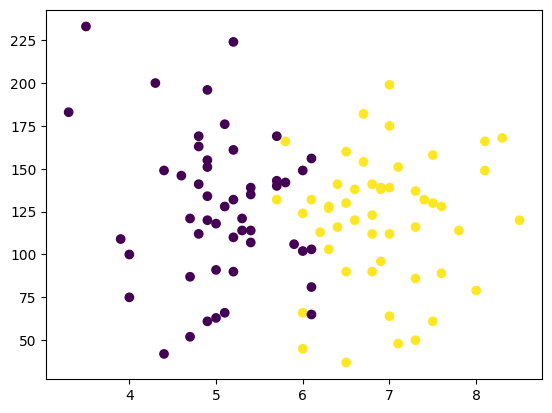

In [12]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

#### FEATURE SELECTION : We have a toy dataset where we have only 2 columns and both will be our features

# **STEP 1**

In [13]:
X = df.iloc[:,0:2] # Input columns: cgpa, iq
y = df.iloc[:,-1] # Output column: Placement

# **STEP 2**

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [15]:
X_train

,cgpa,iq
21,7.1,151.0
87,5.7,132.0
72,7.3,116.0
71,6.1,132.0
80,4.9,196.0
...,...,...
91,7.5,158.0
52,7.0,175.0
96,4.4,42.0
1,5.9,106.0


In [16]:
y_train

21    1
87    1
72    1
71    1
80    0
     ..
91    1
52    1
96    0
1     0
2     0
Name: placement, Length: 90, dtype: int64

In [17]:
X_test

,cgpa,iq
51,4.8,141.0
93,6.8,112.0
84,5.7,169.0
62,6.0,102.0
38,6.5,160.0
44,7.5,61.0
17,3.3,183.0
24,4.7,121.0
90,7.3,86.0
6,5.7,143.0


In [18]:
y_test

51    0
93    1
84    0
62    0
38    1
44    1
17    0
24    0
90    1
6     0
Name: placement, dtype: int64

# **STEP 3**

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

# **STEP 4**

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression()

In [27]:
# Model Train
clf.fit(X_train, y_train)

LogisticRegression()

# **STEP 5**

In [30]:
y_pred = clf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score


In [32]:
accuracy_score(y_test, y_pred)

0.9

# **STEP 6**

In [34]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

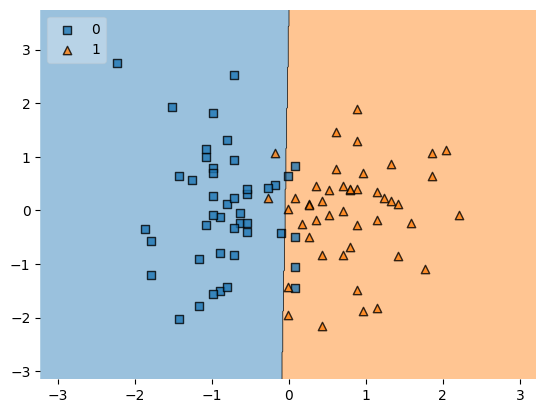

In [36]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

#**STEP 7**

In [37]:
import pickle

In [38]:
pickle.dump(clf, open('model.pkl','wb'))